# Human Resource Exploratory Data Analysis

**Aim**: The aim of this notebook is to introduce the reader to the fundamental concepts behind exploratory data analysis.

## Table of contents

1. Comprehending the analytical base table
2. Analyzing the distribution of a single feature
3. Analyzing the relationships between multiple features
4. Manipulating the data in order to reveal statistical insights

## Package Requirements

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Comprehending the analytical base table

In [3]:
#Reading in the data

df = pd.read_csv('core_dataset.csv')

In [4]:
#Viewing the first 5 rows

df.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,...,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,...,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,Male,Single,US Citizen,No,...,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,Female,Married,US Citizen,No,...,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,...,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [5]:
#Viewing the last 5 rows

df.tail()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
297,"Saada, Adell",1.012023e+09,MA,2132.0,7/24/1986,31.0,Female,Married,US Citizen,No,...,11/5/2012,NaN,N/A - still employed,Active,Software Engineering,Software Engineer,49.25,Alex Sweetwater,Pay Per Click - Google,Fully Meets
298,"Szabo, Andrew",1.201031e+09,MA,2140.0,5/6/1983,34.0,Male,Single,US Citizen,No,...,7/7/2014,NaN,N/A - still employed,Active,Software Engineering,Software Engineer,48.00,Alex Sweetwater,MBTA ads,Exceptional
299,"True, Edward",1.102024e+09,MA,2451.0,6/14/1983,34.0,Male,Single,Non-Citizen,No,...,2/18/2013,4/15/2014,medical issues,Voluntarily Terminated,Software Engineering,Software Engineer,45.42,Alex Sweetwater,Diversity Job Fair,Fully Meets
300,"Sweetwater, Alex",1.001645e+09,MA,2184.0,11/22/1966,51.0,Male,Single,US Citizen,No,...,8/15/2011,NaN,N/A - still employed,Active,Software Engineering,Software Engineering Manager,27.00,Jennifer Zamora,Search Engine - Google Bing Yahoo,Fully Meets
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Viewing general information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
Employee Name          301 non-null object
Employee Number        301 non-null float64
State                  301 non-null object
Zip                    301 non-null float64
DOB                    301 non-null object
Age                    301 non-null float64
Sex                    301 non-null object
MaritalDesc            301 non-null object
CitizenDesc            301 non-null object
Hispanic/Latino        301 non-null object
RaceDesc               301 non-null object
Date of Hire           301 non-null object
Date of Termination    103 non-null object
Reason For Term        301 non-null object
Employment Status      301 non-null object
Department             301 non-null object
Position               301 non-null object
Pay Rate               301 non-null float64
Manager Name           301 non-null object
Employee Source        301 non-null object
Performance Score      301 non-

**Example of converting a feature to categorical**

In [7]:
#Converting a feature to categorical 

df['sex'] = df['Sex'].astype('category')

In [8]:
df['sex'].dtype

CategoricalDtype(categories=['Female', 'Male', 'male'], ordered=False)

**Example of cleaning the data**

In [9]:
#Creating a dictionary of correct mappings

category_correction = {"Male": ['Male', 'male'], "Female": ['Female']}

#Creating the correction 

correction = {v: k for k,vv in category_correction.items() for v in vv}

In [10]:
#Mapping the correction

df['sex'] = df['sex'].map(correction)

In [11]:
#Verifying if we have the two categories as expected

df['sex'].value_counts()

Female    174
Male      127
Name: sex, dtype: int64

In [12]:
#Dropping all the missing values

df = df.dropna()

## Visualizing Numerical Features

**The Box Plot**

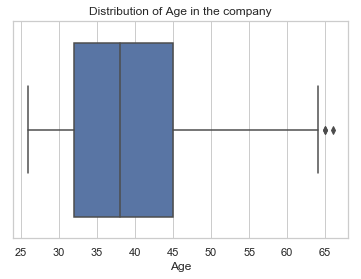

In [13]:
#Setting the style of the plot
sns.set(style="whitegrid")

#Creating the boxplot
ax = sns.boxplot(x= df["Age"])

plt.title('Distribution of Age in the company')

plt.show()

**The Density Plot**

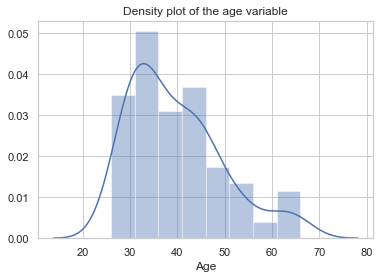

In [14]:
#Creating the density plot

sns.distplot(df['Age'])

#Creating the title

plt.title('Density plot of the age variable')

plt.show()

## Visualzing the categorical features

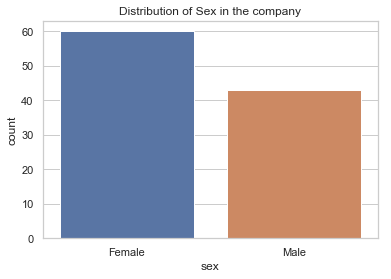

In [17]:
#Converting the sex variable to categorical 

df['sex'] = df['sex'].astype('category')

#Bar plot of the sex variable

sns.countplot(df['sex'])

#Title

plt.title('Distribution of Sex in the company')

plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 3 to 299
Data columns (total 22 columns):
Employee Name          103 non-null object
Employee Number        103 non-null float64
State                  103 non-null object
Zip                    103 non-null float64
DOB                    103 non-null object
Age                    103 non-null float64
Sex                    103 non-null object
MaritalDesc            103 non-null object
CitizenDesc            103 non-null object
Hispanic/Latino        103 non-null object
RaceDesc               103 non-null object
Date of Hire           103 non-null object
Date of Termination    103 non-null object
Reason For Term        103 non-null object
Employment Status      103 non-null object
Department             103 non-null object
Position               103 non-null object
Pay Rate               103 non-null float64
Manager Name           103 non-null object
Employee Source        103 non-null object
Performance Score      103 non-

In [19]:
df['sex'].value_counts()

Female    60
Male      43
Name: sex, dtype: int64

## Visualizing the relationship between two numerical features

**The Scatter Plot**

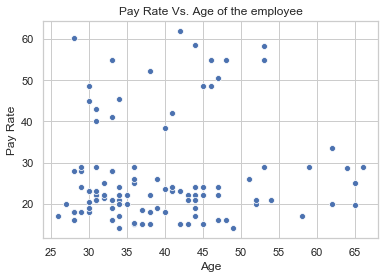

In [20]:
#Construct the plot 
sns.scatterplot(x="Age", y="Pay Rate", data=df)

#Create title & display the plot
plt.title("Pay Rate Vs. Age of the employee")

plt.show()

**The Scatter Plot with the Trend Line**

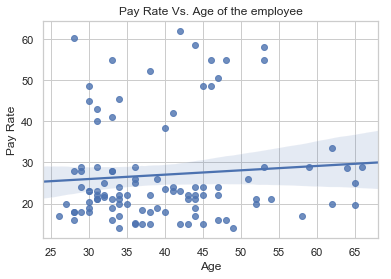

In [21]:
#Construct the plot 
sns.regplot(x="Age", y="Pay Rate", data=df)

#Create title & display the plot
plt.title("Pay Rate Vs. Age of the employee")

plt.show()

**The Joint Density Plot**

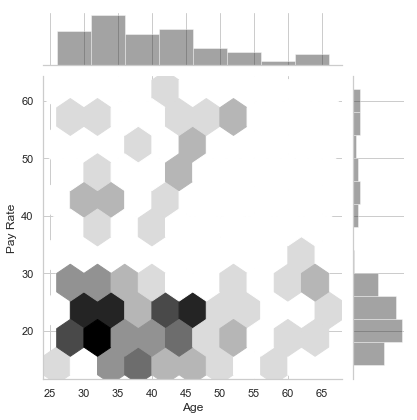

In [22]:
# Construct the Joint Density Plot

sns.jointplot(x= "Age", y= "Pay Rate", data = df, kind="hex", color="k")

plt.show()

## Visualizing the relationship between categorical & numerical variables

**The strip plot**

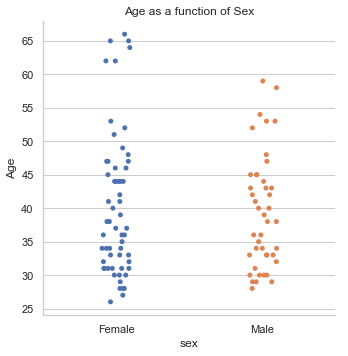

In [23]:
# Construct the strip plot

sns.catplot(x="sex", y="Age", data=df)

# Create a title & visualize the plot

plt.title('Age as a function of Sex')

plt.show()

**Categorical Boxplot**

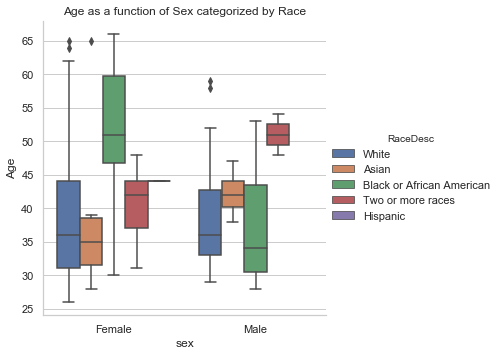

In [24]:
#Create the plot

sns.catplot(x="sex", y="Age", hue="RaceDesc", kind="box", data=df)

# Create a title & visualize the plot

plt.title('Age as a function of Sex categorized by Race')

plt.show()

**Violin Plot**

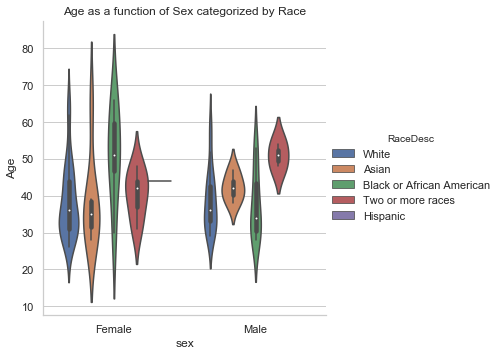

In [25]:
#Create the plot

sns.catplot(x="sex", y="Age", hue="RaceDesc", kind="violin", data=df)

# Create a title & visualize the plot

plt.title('Age as a function of Sex categorized by Race')

plt.show()

**Categorical Bar Plot**

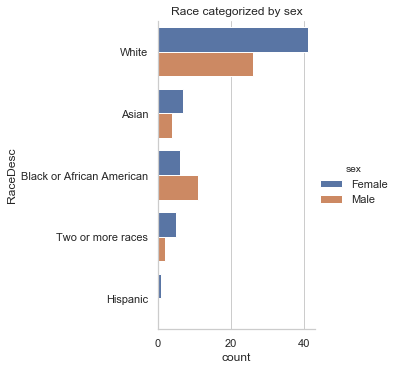

In [26]:
#Create the plot

sns.catplot(y="RaceDesc", hue="sex", kind="count", data= df)

#Create a title & display the plot

plt.title('Race categorized by sex')

plt.show()

**Categorical Scatterplot**

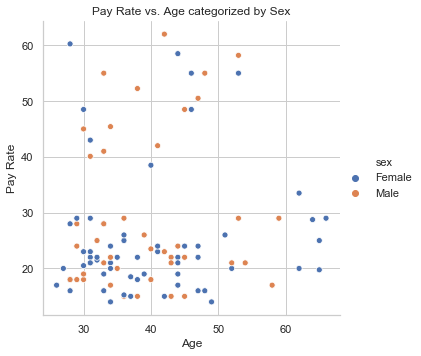

In [27]:
#Create the categorical scatterplot

sns.relplot(x="Age", y="Pay Rate", hue="sex", data=df)

#Create a title & display the plot

plt.title('Pay Rate vs. Age categorized by Sex')

plt.show()

## Visualizing time series distributions

In [32]:
#Creating a time series dataframe

df = pd.DataFrame(dict(time=pd.date_range("2015-12-1", periods=1000),
                       value=np.random.randn(1000).cumsum()))

In [33]:
df.head()

,time,value
0,2015-12-01,0.455729
1,2015-12-02,-1.400459
2,2015-12-03,-0.069538
3,2015-12-04,-1.104524
4,2015-12-05,-0.021750


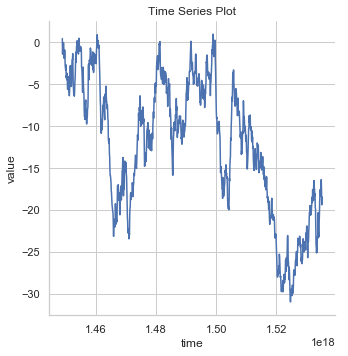

In [35]:
#Create plot

sns.relplot(x="time", y="value", kind="line", data=df)

#Create a title & display the plot

plt.title('Time Series Plot')

plt.show()

## Manipulating data in order to reveal statistical insights

**Creating new features**

In [38]:
#Reading in the data

df = pd.read_csv('core_dataset.csv')

#Extracting the maximum payrate

df['Pay Rate'].max()

80.0

In [39]:
#Creating the new feature

df['payrate_ratio'] = (df['Pay Rate'])/(df['Pay Rate'].max())

In [41]:
df['payrate_ratio'].head()

0    0.35625
1    0.28750
2    0.36250
3    0.26875
4    0.20700
Name: payrate_ratio, dtype: float64

**Answering organizational questions through manipulation**

In [46]:
# Creating datasets for the males & females

df_male = df[df['Sex'] == 'Male']

df_female = df[df['Sex'] == 'Female']

In [48]:
#Filtering ages over 50

df_male_50 = df_male[df_male['Age'] > 50.0]

df_female_50 = df_female[df_female['Age'] > 50.0]

In [49]:
#Extracting the average pay rates for males & females over 50

mean_pay_male = df_male_50['Pay Rate'].mean()
mean_pay_female = df_female_50['Pay Rate'].mean()

print('The mean pay rate for the male employees is' + ' ' + str(mean_pay_male))
print('The mean pay rate for the female employees is' + ' ' + str(mean_pay_female))

The mean pay rate for the male employees is 34.0636363636
The mean pay rate for the female employees is 34.53
